In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
df.head()
print(df.shape)
print(df.info())

(1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel     

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
print("Unique values in Attrition before celaning:", df["Attrition"].unique())

Unique values in Attrition before celaning: ['Yes' 'No']


In [7]:
df["Attrition"] = df["Attrition"].astype(str).str.strip().str.capitalize()

print("Unique values in Attrition after cleaning:", df["Attrition"].unique())

Unique values in Attrition after cleaning: ['Yes' 'No']


In [8]:
# df_clean.isnull().sum()

Rows after filtering valid Attrition: 1470


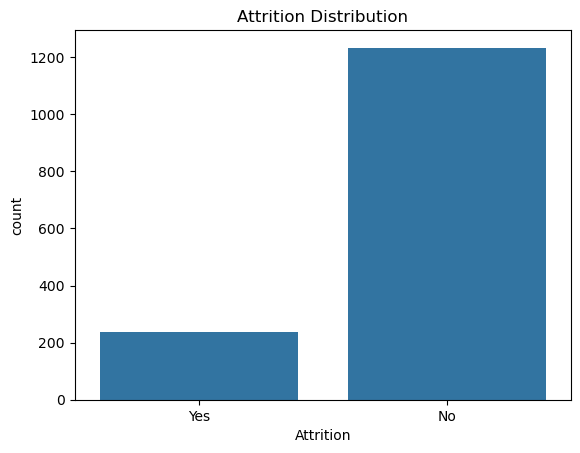

In [9]:
df_clean = df[df["Attrition"].isin(["Yes", "No"])].copy()
print(f"Rows after filtering valid Attrition: {len(df_clean)}")

#optionl: visualize target distraction
sns.countplot(x="Attrition", data=df_clean)
plt.title("Attrition Distribution")
plt.show()

In [10]:
y = df_clean['Attrition'].map({'Yes': 1, 'No':0})
x = df_clean.drop(columns=['Attrition'])

In [11]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [12]:
df_clean.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [11]:
df_clean.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [12]:
drop_cols = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
numerical_cols = [
    'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
    'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
    'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
    'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
    'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

In [13]:
def binary_cleanup(data):
    data = data.copy()
    data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
    data['OverTime'] = data['OverTime'].map({'Yes': 1, 'No': 0})
    return data.drop(columns=drop_cols)

binary_transformer = FunctionTransformer(binary_cleanup)

In [14]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_cols),
    ('cat', cat_pipeline, categorical_cols)
], remainder='passthrough')

In [15]:
full_pipeline = Pipeline([
    ('cleanup', binary_transformer),
    ('preprocessing', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

In [16]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [17]:
full_pipeline.fit(x_train, y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('cleanup',
                 FunctionTransformer(func=<function binary_cleanup at 0x000002744B62F1A0>)),
                ('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'Hou...
                                                   'TrainingTimesLastYear',
                                                   'WorkLifeBalance',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'JobRole',
                                                   'MaritalStatus'])])),
                ('model', LogisticRegression(max_iter=1000))])

In [40]:
y_pred = full_pipeline.predict(x_test)

In [60]:

print("\n Accuracy:", accuracy_score(y_test, y_pred))
print("\n confusion_matrix:\n", confusion_matrix(y_test, y_pred))
print("n\ classification_report:\n", classification_report(y_test, y_pred))


 Accuracy: 0.8877551020408163

 confusion_matrix:
 [[244  11]
 [ 22  17]]
n\ classification_report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       255
           1       0.61      0.44      0.51        39

    accuracy                           0.89       294
   macro avg       0.76      0.70      0.72       294
weighted avg       0.88      0.89      0.88       294



<>:3: SyntaxWarning: invalid escape sequence '\ '
<>:3: SyntaxWarning: invalid escape sequence '\ '
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12960\1894183773.py:3: SyntaxWarning: invalid escape sequence '\ '
  print("n\ classification_report:\n", classification_report(y_test, y_pred))


In [62]:
import joblib

joblib.dump(full_pipeline, 'attrition_model.joblib')

print("Model saved as attrition_model.joblib")

Model saved as attrition_model.joblib


In [64]:
import joblib
import pandas as pd

# Load the trained pipeline
model = joblib.load("attrition_model.joblib")

# Create a sample input matching the original training feature columns
sample = pd.DataFrame([{
    'Age': 35,
    'DailyRate': 800,
    'DistanceFromHome': 10,
    'Education': 3,
    'EnvironmentSatisfaction': 3,
    'Gender': 'Male',
    'HourlyRate': 60,
    'JobInvolvement': 3,
    'JobLevel': 2,
    'JobSatisfaction': 3,
    'MonthlyIncome': 5000,
    'MonthlyRate': 15000,
    'NumCompaniesWorked': 2,
    'OverTime': 'Yes',
    'PercentSalaryHike': 15,
    'PerformanceRating': 3,
    'RelationshipSatisfaction': 3,
    'StockOptionLevel': 1,
    'TotalWorkingYears': 8,
    'TrainingTimesLastYear': 3,
    'WorkLifeBalance': 3,
    'YearsAtCompany': 4,
    'YearsInCurrentRole': 2,
    'YearsSinceLastPromotion': 1,
    'YearsWithCurrManager': 2,
    'BusinessTravel': 'Travel_Rarely',
    'Department': 'Research & Development',
    'EducationField': 'Life Sciences',
    'JobRole': 'Research Scientist',
    'MaritalStatus': 'Single',
    'EmployeeCount': 1,
    'Over18': 'Y',
    'StandardHours': 80,
    'EmployeeNumber': 12345
}])

prediction = model.predict(sample)[0]
print(prediction)
label = "Yes (Will Leave)" if prediction == 1 else "No (Will Stay)"
print("Prediction:", label)

0
Prediction: No (Will Stay)
